### **28 - interestClub**

**Implement the missing code, denoted by ellipses. You may not modify the pre-existing code.**

You are the chairman of your university's drawing club, which isn't doing very well right now. The club meets two times a week to exchange drawing advice, talk about new techniques, and draw something together. But the members are starting to get bored during these meetings, so you've decided to add an additional activity to the routine.

In order to do this, you decided to collect information about the students, which is now stored in the table `people_interests`, which has the following columns:

* `name` - the unique name of a person;
* `interests` - the set of interests or hobbies this person has, given as a comma-joined string. This column has datatype `set('reading','sports','swimming','drawing','writing','acting','cooking','dancing','fishkeeping','juggling','sculpting','videogaming')`.

This information gave you the idea that reading might be an interesting theme for the next meeting, so you announced that the next meeting will be reading-related. Now you're interested in the number of members that will come.

Given the `people_interests` table, find the people who will attend the next meeting, i.e. those who are fond of both drawing and reading. The resulting table should consist of a single `name` column, and the records should be sorted by people's names.

**Example**

For given table `people_interests`

| `name` | `interests`                                         |
| ------ | --------------------------------------------------- |
| August | cooking,juggling                                    |
| Buddy  | reading,swimming,drawing,acting,dancing,videogaming |
| David  | juggling,sculpting                                  |
| Dennis | swimming,cooking,fishkeeping                        |
| James  | reading,drawing                                     |

the output should be

| `name` |
| ------ |
| Buddy  |
| James  |

* [execution time limit] 10 seconds (mysql)

* [memory limit] 1 GB

**Solution**

```sql
CREATE PROCEDURE solution()
    SELECT name
    FROM people_interests
    WHERE interests & (interests LIKE '%reading%') AND interests & (interests LIKE '%drawing%')
    ORDER BY name
```

***

### **29 - personalHobbies**

You've been looking for new friends on the Internet. You just came across a cool website that helps people all over the world become friends by suggesting perfect friend candidates based on the information in users' profiles.

The system suggested some people for you to reach out to, and you're ready to make a move. However, you don't want to exercise your communication skills in vain, which is why prior to contacting a person you want to make sure you'll have something in common to talk about. The best option is to check whether they have the same hobbies you do, which are sports and reading.

You downloaded the list of suggested people and saved it in the `people_hobbies` table, which has the following structure:

* `name` - the unique person's name;
* `hobbies` - a list of hobbies the person has (this column is of the datatype set).
  
Given the `people_hobbies` table, your goal is to return the sorted names of people who have sports and reading in their list of `hobbies`.

**Example**

For the given table `people_hobbies`

| `name` | `hobbies`               |
| ------ | ----------------------- |
| Adam   | swimming                |
| Amy    | reading,sports,swimming |
| Carl   | filmwatching,writing    |
| Carol  | reading,swimming        |
| Deril  | sports                  |
| Jake   | reading,swimming        |
| Lola   | reading,sports,painting |
| Nina   | sports,painting         |
| Sam    | sports                  |

the output should be

| `name` |
| ------ |
| Amy    |
| Lola   |

As you can see, only Amy and Lola have both reading and sports in their hobbies lists.

* [execution time limit] 10 seconds (mysql)

* [memory limit] 1 GB

**Solution**

```sql
CREATE PROCEDURE solution()
BEGIN
    SELECT name
    FROM people_hobbies
    WHERE hobbies LIKE '%sports%' AND hobbies LIKE '%reading%'
    ORDER BY name
    ;
END
```

***

### **30 - booksCatalogs**

You have your very own library at home, and it's getting bigger and bigger with each passing month. You've decided to create a database in which to store information about your books, in the hope that it will help you remember which books you have in your library.

Information about the books in your library is stored in the table `catalogs`, which contains the following columns:

* `doc_id` - the unique ID of the catalog;
* `xml_doc` - the catalog as an XML file in the following format:
```html
<catalog>
  <book id='...'>
    <author>...</author>
    <title>...</title>
  </book>
  <book id='...'>
    <author>...</author>
    <title>...</title>
  </book>
  ...
</catalog>.
```

Each catalog represents the work of one distinct `<author>` in your library. There is exactly one `<catalog>` element in each `xml_doc`, and the `id` for each book is unique.

Given the `catalogs` table, you want to find out which authors you have represented in your library. Your task is to create a new table with the author column that will contain all the distinct `authors`, sorted by their names.

**Example**

For given table `catalogs`

`doc_id` = 1

`xml_doc` = 
```html
<catalog>
 <book id='11'>
  <author>Chuck Palahniuk</author>
  <title>Fight Club</title>
 </book>
 <book id='12'>
  <author>Chuck Palahniuk</author>
  <title>Survivor</title>
 </book>
</catalog> 
```

`doc_id` = 2

`xml_doc` = 
```html
<catalog>
 <book id='21'>
  <author>Bernard Werber</author>
  <title>Les Thanatonautes</title>
 </book>
</catalog>
```

`doc_id` = 3

`xml_doc` = 
```html
<catalog>
 <book id='31'>
  <author>Boris Vian</author>
  <title>The Big Sleep</title>
 </book>
 <book id='32'>
  <author>Boris Vian</author>
  <title>The Lady in the Lake</title>
 </book>
 <book id='33'>
  <author>Boris Vian</author>
  <title>The World of Null-A</title>
 </book>
</catalog>
```

the output should be

| `author`        |
| --------------- |
| Bernard Werber  |
| Boris Vian      |
| Chuck Palahniuk |

* [execution time limit] 10 seconds (mysql)

* [memory limit] 1 GB

**Solution**

```sql
CREATE PROCEDURE solution()
BEGIN
    SELECT SUBSTRING_INDEX(EXTRACTVALUE(xml_doc, '//author'), ' ', 2) AS author
    -- EXTRACTVALUE(xml_doc, '/catalog[1]/book[1]/author[1]') AS author
    FROM catalogs
    ORDER BY author
    ;
END
```

***

### **31 - habitatArea**

As a young naturalist, you've been studying the inhabitants of the nearby woods for the past several months. You've just come across some footprints you've never seen before. To learn more about the habitat of the animal that left them, you marked the footprints locations on your map.

The information about the places where the animal left its footprints is stored in the table `places`. Here is its structure:

* `x`: the x-coordinate of the place;
* `y`: the y-coordinate of the place.

It is guaranteed that pairs `(x, y)` are unique.

Now you want to find the area of the animal's habitat. You decided that the convex hull of the marked points is a good first approximation of the habitat, so you want to find the area of this hull.

Given the `places` table, write a select statement which returns only one column `area` and consists of a single row: the area of the convex hull. It is guaranteed that the resulting area is greater than `0`.

**Example**

For the following table places

| `x` | `y` |
| --- | --- |
| 0   | 0   |
| 1   | 2   |
| 2   | 1   |
| 5   | 1   |
| 5   | 2   |

the output should be

| `area` |
| ------ |
| 6.5    |

Here is an illustration of the given points and their convex hull:

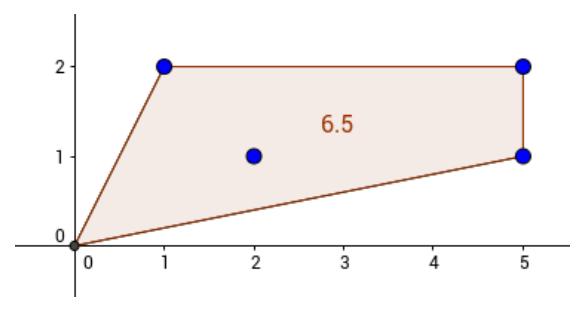

Note that you should return the exact answer without any trailing zeros.

* [execution time limit] 10 seconds (mysql)

* [memory limit] 1 GB

**Solution**

```sql
CREATE PROCEDURE solution()
BEGIN
    SELECT ST_AREA(ST_CONVEXHULL(ST_GEOMFROMTEXT(CONCAT('MULTIPOINT (', GROUP_CONCAT(x , ' ', y SEPARATOR ', '), ')'), 0))) AS area
    FROM places
    ;
END
```